<a href="https://colab.research.google.com/github/szh141/Examples/blob/main/sklearn_PCA_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://lectures.scientific-python.org/packages/scikit-learn/index.html#unsupervised-learning-dimensionality-reduction-and-visualization

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,whiten=True)
pca.fit(X)
print(pca.components_,'\n')
print(pca.explained_variance_ratio_)


[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]] 

[0.92461872 0.05306648]


Let us project the iris dataset along those first two dimensions

To understand X_pca.transform(X)
https://stackoverflow.com/questions/42167907/understanding-scikitlearn-pca-transform-function-in-python


In [11]:
X_pca = pca.transform(X)
X_pca.shape

(150, 2)

PCA normalizes and whitens the data, which means that the data is now centered on both components with unit variance:

In [19]:
# PCA with whiten=True
print(X_pca.mean(axis=0))
print(X_pca.std(axis=0, ddof=1))

[-1.37371596e-15 -1.84815126e-15]
[1. 1.]


Furthermore, the samples components do no longer carry any linear correlation:

In [14]:
import numpy as np
np.corrcoef(X_pca.T)

array([[1.00000000e+00, 9.57455404e-16],
       [9.57455404e-16, 1.00000000e+00]])

In [30]:
range(len(iris.target_names))

range(0, 3)

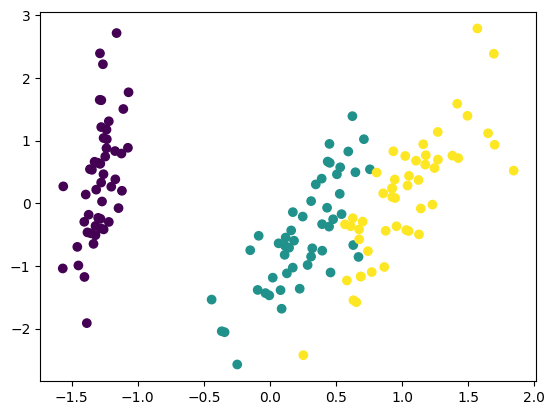

In [31]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)

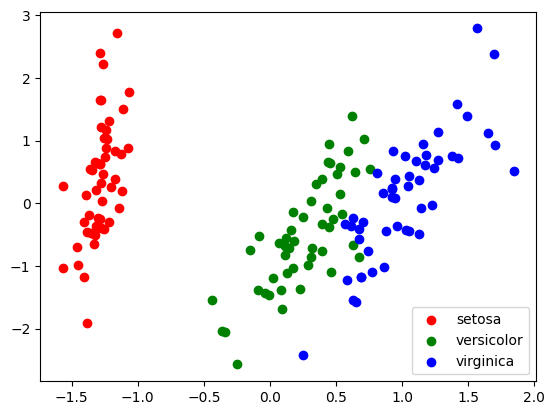

In [36]:
from matplotlib import pyplot as plt
target_ids = range(len(iris.target_names))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                c=c, label=label)
    plt.legend()
"""
for loop only has 3 loops, 0,1,2 for three name/color pairs
y is the iris.data.target, has 150 rows
1st loop, plot 0
2nd loop, plot 1
3rd loop, plot 2
use y == i as selection criteria
"""